In [1]:
# %load command1.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


In [2]:
df_sales=pd.read_csv('./pandasData/resample/sales_data.csv', 
                    parse_dates=['date'],
                    index_col='date')
df_sales

,num_sold
date,
2017-01-02 09:02:03,5
2017-01-02 09:14:13,7
2017-01-02 09:21:00,5
2017-01-02 09:28:57,9
2017-01-02 09:42:14,1
...,...
2017-01-02 22:46:36,5
2017-01-02 22:48:08,5
2017-01-02 22:52:19,2


In [3]:
df_sales.resample('2H').sum()

,num_sold
date,
2017-01-02 08:00:00,37
2017-01-02 10:00:00,66
2017-01-02 12:00:00,81
2017-01-02 14:00:00,50
2017-01-02 16:00:00,64
2017-01-02 18:00:00,66
2017-01-02 20:00:00,44
2017-01-02 22:00:00,45


In [4]:
df_sales.resample('2H').agg(['min', 'max', 'sum'])

num_sold        
                         min max sum
date                                
2017-01-02 08:00:00        1   9  37
2017-01-02 10:00:00        1   9  66
2017-01-02 12:00:00        1   9  81
2017-01-02 14:00:00        1   9  50
2017-01-02 16:00:00        1   8  64
2017-01-02 18:00:00        1   9  66
2017-01-02 20:00:00        1   9  44
2017-01-02 22:00:00        2   6  45

### Downsampling with a custom `base`
By default, for the frequencies that evenly subdivide 1 day/month/year, the “origin” of the aggregated intervals is defaulted to 0. So, for the 2H frequency, the result range will be 00:00:00, 02:00:00, 04:00:00, …, 22:00:00.

For the sales data we are using, the first record has a date value 2017–01–02 09:02:03 , so it makes much more sense to have the output range start with 09:00:00, rather than 08:00:00. To do that, we can set the “origin” of the aggregated intervals to a different value using the argument base, for example, set base=1 so the result range can start with 09:00:00.

In [5]:
df_sales.resample('2H',base=1).sum()

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  """Entry point for launching an IPython kernel.


,num_sold
date,
2017-01-02 09:00:00,62
2017-01-02 11:00:00,77
2017-01-02 13:00:00,64
2017-01-02 15:00:00,55
2017-01-02 17:00:00,72
2017-01-02 19:00:00,48
2017-01-02 21:00:00,70
2017-01-02 23:00:00,5


In [6]:
df_sales.resample('2H',offset='1H').sum()

,num_sold
date,
2017-01-02 09:00:00,62
2017-01-02 11:00:00,77
2017-01-02 13:00:00,64
2017-01-02 15:00:00,55
2017-01-02 17:00:00,72
2017-01-02 19:00:00,48
2017-01-02 21:00:00,70
2017-01-02 23:00:00,5


### Upsampling and filling values
Upsampling is the opposite operation of downsampling. It resamples a time-series dataset to a smaller time frame. For example, from hours to minutes, from years to days. The result will have an increased number of rows and additional rows values are defaulted to NaN. The built-in method ffill() and bfill() are commonly used to perform forward filling or backward filling to replace NaN.

In [7]:
df = pd.DataFrame(
    { 'value': [1, 2, 3] }, 
    index=pd.period_range(
        '2012-01-01',
         freq='A',
         periods=3
    )
)

df

df.resample('Q').ffill()
df.resample('Q').bfill()

,value
2012,1
2013,2
2014,3


,value
2012Q1,1
2012Q2,1
2012Q3,1
2012Q4,1
2013Q1,2
2013Q2,2
2013Q3,2
2013Q4,2
2014Q1,3
2014Q2,3


,value
2012Q1,1.00
2012Q2,2.00
2012Q3,2.00
2012Q4,2.00
2013Q1,2.00
2013Q2,3.00
2013Q3,3.00
2013Q4,3.00
2014Q1,3.00
2014Q2,NaN


### Examples

In [8]:
df_sales=pd.read_csv('./pandasData/resample/sales.csv', 
                    parse_dates=['date'],
                    index_col='date')
df_sales


df_price=pd.read_csv('./pandasData/resample/price.csv', 
                    parse_dates=['date'],
                    index_col='date')
df_price

,num_sold
date,
2018-01-31,5
2018-02-28,17
2018-03-31,5
2018-04-30,16
2018-05-31,12
2018-06-30,12
2018-07-31,2
2018-08-31,9
2018-09-30,5


,price
date,
2018-01-31,16.00
2018-05-31,15.50
2018-12-31,10.00


In [9]:
df_price=df_price.resample('M').ffill()
df_price

,price
date,
2018-01-31,16.00
2018-02-28,16.00
2018-03-31,16.00
2018-04-30,16.00
2018-05-31,15.50
2018-06-30,15.50
2018-07-31,15.50
2018-08-31,15.50
2018-09-30,15.50


In [10]:
combined_df=pd.concat([df_sales, df_price], axis=1)
combined_df.head(50)

,num_sold,price
date,,
2018-01-31,5,16.00
2018-02-28,17,16.00
2018-03-31,5,16.00
2018-04-30,16,16.00
2018-05-31,12,15.50
2018-06-30,12,15.50
2018-07-31,2,15.50
2018-08-31,9,15.50
2018-09-30,5,15.50


In [11]:
combined_df['total_sales']=combined_df['num_sold'] * combined_df['price']
combined_df

,num_sold,price,total_sales
date,,,
2018-01-31,5,16.00,80.00
2018-02-28,17,16.00,272.00
2018-03-31,5,16.00,80.00
2018-04-30,16,16.00,256.00
2018-05-31,12,15.50,186.00
2018-06-30,12,15.50,186.00
2018-07-31,2,15.50,31.00
2018-08-31,9,15.50,139.50
2018-09-30,5,15.50,77.50


In [12]:
len(combined_df.index)

12

[ 0  1  2  3  4  5  6  7  8  9 10 11]
['2018-1', '2018-2', '2018-3', '2018-4', '2018-5', '2018-6', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12']



[Text(0, 0, '2018-1'),
 Text(1, 0, '2018-2'),
 Text(2, 0, '2018-3'),
 Text(3, 0, '2018-4'),
 Text(4, 0, '2018-5'),
 Text(5, 0, '2018-6'),
 Text(6, 0, '2018-7'),
 Text(7, 0, '2018-8'),
 Text(8, 0, '2018-9'),
 Text(9, 0, '2018-10'),
 Text(10, 0, '2018-11'),
 Text(11, 0, '2018-12')]

Text(-0.3, 85.0, ' 80')

Text(0.7, 277.0, ' 272')

Text(1.7, 85.0, ' 80')

Text(2.7, 261.0, ' 256')

Text(3.7, 191.0, ' 186')

Text(4.7, 191.0, ' 186')

Text(5.7, 36.0, ' 31')

Text(6.7, 144.5, ' 140')

Text(7.7, 82.5, ' 78')

Text(8.7, 237.5, ' 232')

Text(9.7, 284.0, ' 279')

Text(10.7, 355.0, ' 350')

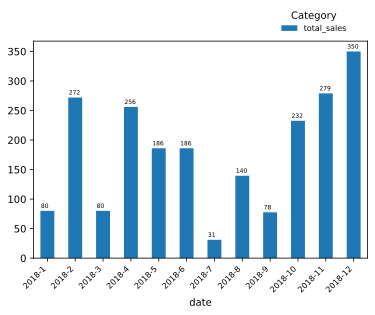

In [13]:
bar_graph=combined_df.plot.bar(y='total_sales',
                    xticks=np.arange(len(combined_df.index)))

print(bar_graph.get_xticks())

labels=[f'{date.year}-{date.month}' for date in combined_df.index.date]
print(labels)

print()

bar_graph.set_xticklabels(labels)

for label in bar_graph.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
    label.set_fontsize(8)
    
for i in range(len(bar_graph.get_xticks())):
    bar_graph.annotate(f'{combined_df["total_sales"][i]: .0f}', 
                       (bar_graph.get_xticks()[i]-0.3,
                        combined_df['total_sales'][i]+5), 
                       fontsize=6 )

leg=bar_graph.legend(loc=(0.73, 1.02), frameon=False, labelspacing=0.5, borderpad=0.5, fontsize=8)
leg.set_title('Category', prop={'size': 10})